## Customizing Seaborn Plots

In this final chapter, you will learn how to add informative plot titles and axis labels, which are one of the most important parts of any data visualization! You will also learn how to customize the style of your visualizations in order to more quickly orient your audience to the key takeaways. Then, you will put everything you have learned together for the final exercises of the course!

### Changing style and palette

Let's return to our dataset containing the results of a survey given to young people about their habits and preferences. We've provided the code to create a count plot of their responses to the question "How often do you listen to your parents' advice?". Now let's change the style and palette to make this plot easier to interpret.

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

csv_path = 'young-people-survey-responses.csv'
survey_data = pd.read_csv(csv_path)
survey_data['Age Category'] = ['Less than 21' if x < 21.0 else '21 and older' for x in survey_data['Age']]

survey_data['Parents Advice'] = pd.cut(survey_data['Parents\' advice'], 
                                       bins=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0], 
                                       labels=["Never", "Rarely", "Sometimes", "Often", "Always"])

print(survey_data['Parents\' advice'].unique())
print(survey_data['Parents Advice'].unique())

survey_data['Number of Siblings'] = pd.cut(survey_data.Siblings,
                                          bins=[ -1.0, 0.0, 3.0, 100.0],
                                          labels=["0", "1-3", "3+"])
print(survey_data['Siblings'].unique())
print(survey_data['Number of Siblings'].unique())


survey_data['Feels Lonely'] = pd.cut(survey_data.Loneliness,
                                          bins=[0.0, 1.0, 5.0],
                                          labels=["True", "False"])
print(survey_data['Loneliness'].unique())
print(survey_data['Feels Lonely'].unique())

survey_data['Interested in Pets'] = pd.cut(survey_data.Pets,
                                          bins=[0.0, 1.0, 5.0],
                                          labels=["No", "Yes"])
print(survey_data['Pets'].unique())
print(survey_data['Interested in Pets'].unique())

display(survey_data.head(2))


[ 4.  2.  3.  1.  5. nan]
[Often, Rarely, Sometimes, Never, Always, NaN]
Categories (5, object): [Never < Rarely < Sometimes < Often < Always]
[ 1.  2.  3. 10.  0.  4.  5. nan  6.]
[1-3, 3+, 0, NaN]
Categories (3, object): [0 < 1-3 < 3+]
[ 3.  2.  5.  4.  1. nan]
[False, True, NaN]
Categories (2, object): [True < False]
[ 4.  5.  1.  2.  3. nan]
[Yes, No, NaN]
Categories (2, object): [No < Yes]


,Unnamed: 0,Music,Techno,Movies,History,Mathematics,Pets,Spiders,Loneliness,Parents' advice,...,Finances,Age,Siblings,Gender,Village - town,Age Category,Parents Advice,Number of Siblings,Feels Lonely,Interested in Pets
0,0,5.0,1.0,5.0,1.0,3.0,4.0,1.0,3.0,4.0,...,3.0,20.0,1.0,female,village,Less than 21,Often,1-3,False,Yes
1,1,4.0,1.0,5.0,1.0,5.0,5.0,1.0,2.0,2.0,...,3.0,19.0,2.0,female,city,Less than 21,Rarely,1-3,False,Yes


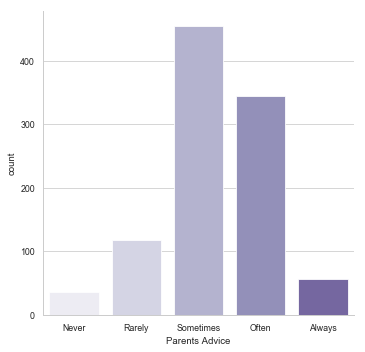

In [32]:
# Set the style to "whitegrid"
sns.set_style("whitegrid")
# Set the color palette to "Purples"
sns.set_palette("Purples")

# Create a count plot of survey responses
category_order = ["Never", "Rarely", "Sometimes", 
                  "Often", "Always"]

sns.catplot(x="Parents Advice", 
            data=survey_data, 
            kind="count", 
            order=category_order)



### Changing the scale

In this exercise, we'll continue to look at the dataset containing responses from a survey of young people. Does the percentage of people reporting that they feel lonely vary depending on how many siblings they have? Let's find out using a bar plot, while also exploring Seaborn's four different plot scales ("contexts").

C:\Users\Jacob\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


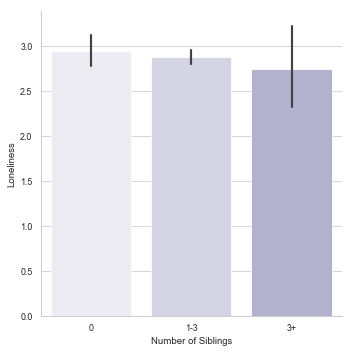

In [35]:
# Set the context to "paper"
sns.set_context("paper")

# Create bar plot
sns.catplot(x="Number of Siblings", y="Loneliness",
            data=survey_data, kind="bar")


### Using a custom palette

So far, we've looked at several things in the dataset of survey responses from young people, including their internet usage, how often they listen to their parents, and how many of them report feeling lonely. However, one thing we haven't done is a basic summary of the type of people answering this survey, including their age and gender. Providing these basic summaries is always a good practice when dealing with an unfamiliar dataset.

The code provided will create a box plot showing the distribution of ages for male versus female respondents. Let's adjust the code to customize the appearance, this time using a custom color palette.

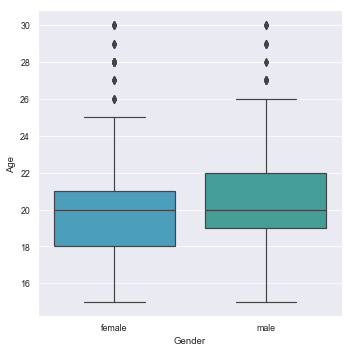

In [36]:
# Set the style to "darkgrid"
sns.set_style("darkgrid")

# Set a custom color palette with the hex color codes "#39A7D0" and "#36ADA4"
sns.set_palette(["#39A7D0","#36ADA4"])

# Create the box plot of age distribution by gender
sns.catplot(x="Gender", y="Age", 
            data=survey_data, kind="box")


### FacetGrids vs. AxesSubplots

Seaborn plots create two different types of objects: `FacetGrid` and `AxesSubplot`
> g = sns.scatterplot(x="height", y="weight", data=df)  
> type(g)
> 
> matplotlib.axes._subplots.AxesSubplot  

|Object Type |Plot Types |Characteristics|
|------------|:-----------|---------------:|
|FacetGrid   |relplot() , catplot()| Can create subplots|
|AxesSubplot |scatterplot() , countplot() , etc. |Only creates a single plot|


Seaborn plot functions create two different types of objects: `FacetGrid` objects and `AxesSubplot` objects. The method for adding a title to your plot will differ depending on the type of object it is.

In the code provided, we've used relplot() with the miles per gallon dataset to create a scatter plot showing the relationship between a car's weight and its horsepower. This scatter plot is assigned to the variable name g. Let's identify which type of object it is.

<class 'seaborn.axisgrid.FacetGrid'>


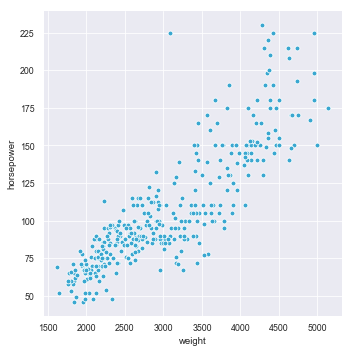

In [38]:
csv_path = 'mpg.csv'
mpg = pd.read_csv(csv_path)

# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Identify plot type
type_of_g = type(g)

# Print type
print(type_of_g)

### Adding a title to a FacetGrid object

In the previous exercise, we used `relplot()` with the miles per gallon dataset to create a scatter plot showing the relationship between a car's weight and its horsepower. This created a `FacetGrid` object. Now that we know what type of object it is, let's add a title to this plot.

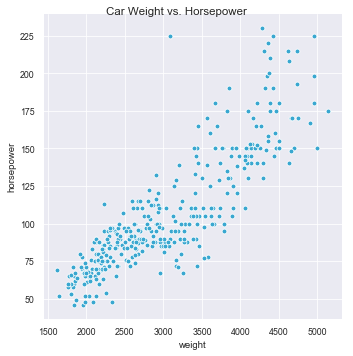

In [39]:
# Create scatter plot
g = sns.relplot(x="weight", 
                y="horsepower", 
                data=mpg,
                kind="scatter")

# Add a title "Car Weight vs. Horsepower"
g.fig.suptitle("Car Weight vs. Horsepower")

# Show plot
plt.show()

### Adding a title and axis labels

Let's continue to look at the miles per gallon dataset. This time we'll create a line plot to answer the question: How does the average miles per gallon achieved by cars change over time for each of the three places of origin? To improve the readability of this plot, we'll add a title and more informative axis labels.

In the code provided, we create the line plot using the `lineplot()` function. Note that `lineplot()` does not support the creation of subplots, so it returns an `AxesSubplot` object instead of an `FacetGrid` object.

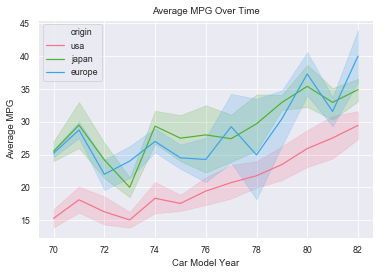

In [45]:
# Create line plot
g = sns.lineplot(x="model_year", y="mpg", 
                 data=mpg,
                 hue="origin")

# Add a title "Average MPG Over Time"
g.set_title("Average MPG Over Time")

#Label the x-axis as "Car Model Year" and the y-axis as "Average MPG".
g.set(xlabel="Car Model Year",
      ylabel="Average MPG")

plt.show()

### Rotating x-tick labels

We create a point plot that displays the average acceleration for cars in each of the three places of origin.  
Let's use this plot to practice rotating the x-tick labels. Recall that the function to rotate x-tick labels is a standalone Matplotlib function and not a function applied to the plot object itself.

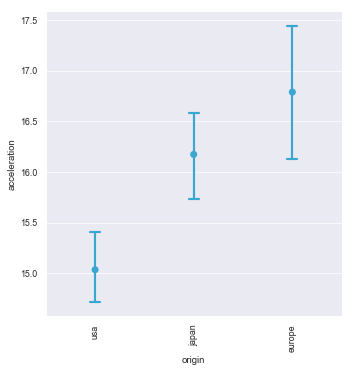

In [47]:
# Create point plot
sns.catplot(x="origin", 
            y="acceleration", 
            data=mpg, 
            kind="point", 
            join=False, 
            capsize=0.1)

# Rotate x-tick labels
plt.xticks(rotation=90)

# Show plot
plt.show()

### Box plot with subgroups

In this exercise, we'll look at the dataset containing responses from a survey given to young people. One of the questions asked of the young people was: "Are you interested in having pets?" Let's explore whether the distribution of ages of those answering "yes" tends to be higher or lower than those answering "no", controlling for gender.

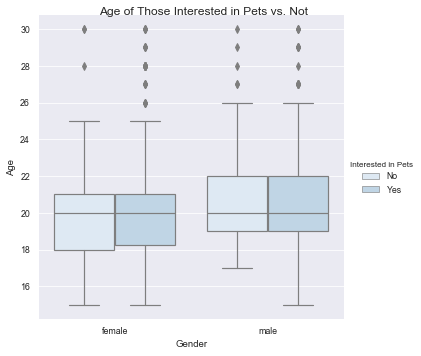

In [50]:
# Set palette to "Blues"
sns.set_palette("Blues")

# Adjust to add subgroups based on "Interested in Pets"
g = sns.catplot(x="Gender",
                y="Age", data=survey_data, 
                kind="box", hue="Interested in Pets")

# Set title to "Age of Those Interested in Pets vs. Not"
g.fig.suptitle("Age of Those Interested in Pets vs. Not")

# Show plot
plt.show()

### Bar plot with subgroups and subplots

In this exercise, we'll return to our young people survey dataset and investigate whether the proportion of people who like techno music (`"Likes Techno"`) varies by their gender (`"Gender"`) or where they live (`"Village - town"`). This exercise will give us an opportunity to practice the many things we've learned throughout this course!

[ 1.  2.  5.  3.  4. nan]
[No, Yes, NaN]
Categories (2, object): [No < Yes]


C:\Users\Jacob\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


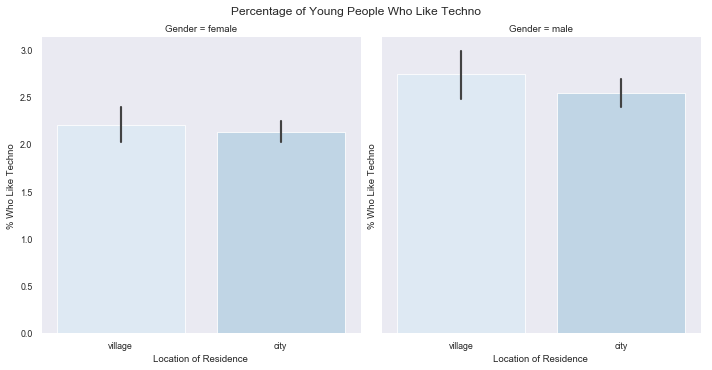

In [53]:
survey_data['Likes Techno'] = pd.cut(survey_data.Techno,
                                          bins=[0.0, 3.0, 5.0],
                                          labels=["No", "Yes"])
print(survey_data['Techno'].unique())
print(survey_data['Likes Techno'].unique())

# Set the figure style to "dark"
sns.set_style("dark")

# Adjust to add subplots per gender
g = sns.catplot(x="Village - town", y="Techno", 
                data=survey_data, kind="bar",
                col="Gender")

# Add title and axis labels
g.fig.suptitle("Percentage of Young People Who Like Techno", y=1.02)
g.set(xlabel="Location of Residence", 
      ylabel="% Who Like Techno")

# Show plot
plt.show()